In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = sns.load_dataset('iris')

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [12]:
df['species'] = encoder.fit_transform(df['species'])

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [15]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

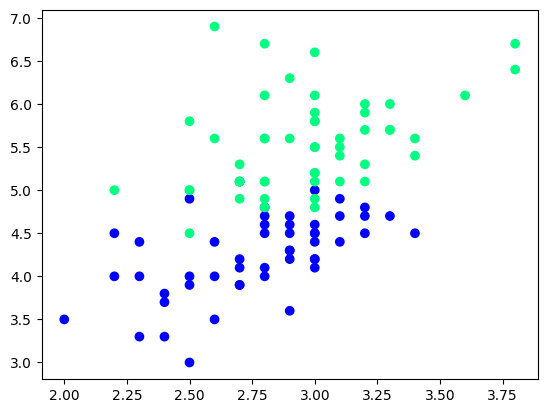

In [18]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [19]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
75,3.0,4.4,1
61,3.0,4.2,1
96,2.9,4.2,1
77,3.0,5.0,1
91,3.0,4.6,1
95,3.0,4.2,1
81,2.4,3.7,1
92,2.6,4.0,1
63,2.9,4.7,1
101,2.7,5.1,2


In [20]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [21]:
df_train

,sepal_width,petal_length,species
113,2.5,5.0,2
71,2.8,4.0,1
116,3.0,5.5,2
75,3.0,4.4,1
63,2.9,4.7,1
149,3.0,5.1,2
98,2.5,3.0,1
134,2.6,5.6,2
136,3.4,5.6,2
87,2.3,4.4,1


In [22]:
df_val

,sepal_width,petal_length,species
100,3.3,6.0,2
92,2.6,4.0,1
127,3.0,4.9,2
101,2.7,5.1,2
88,3.0,4.1,1


In [23]:
df_test

,sepal_width,petal_length,species
55,2.8,4.5,1
74,2.9,4.3,1
110,3.2,5.1,2
50,3.2,4.7,1
145,3.0,5.2,2


In [24]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [25]:
y_test

array([2, 1, 2, 2, 1])

# Case 1 - Bagging

In [56]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
134,2.6,5.6,2
63,2.9,4.7,1
116,3.0,5.5,2
63,2.9,4.7,1
75,3.0,4.4,1
116,3.0,5.5,2
136,3.4,5.6,2
149,3.0,5.1,2


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [28]:
dt_bag1 = DecisionTreeClassifier()

In [38]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

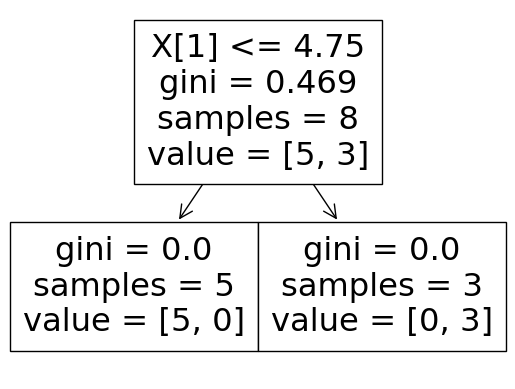

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


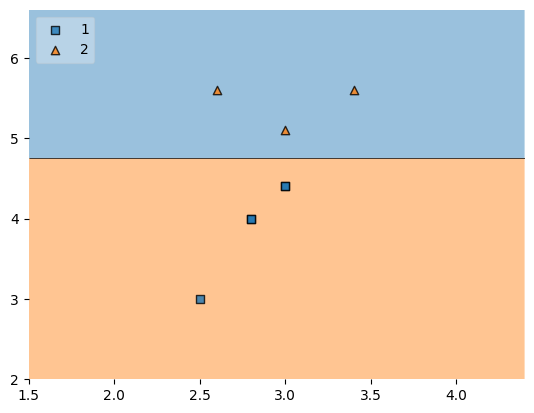

In [39]:
evaluate(dt_bag1,X,y)


In [32]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
113,2.5,5.0,2
98,2.5,3.0,1
113,2.5,5.0,2
63,2.9,4.7,1
75,3.0,4.4,1
134,2.6,5.6,2
63,2.9,4.7,1
71,2.8,4.0,1


In [34]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
98,2.5,3.0,1
134,2.6,5.6,2
87,2.3,4.4,1
63,2.9,4.7,1
116,3.0,5.5,2
87,2.3,4.4,1
134,2.6,5.6,2
134,2.6,5.6,2


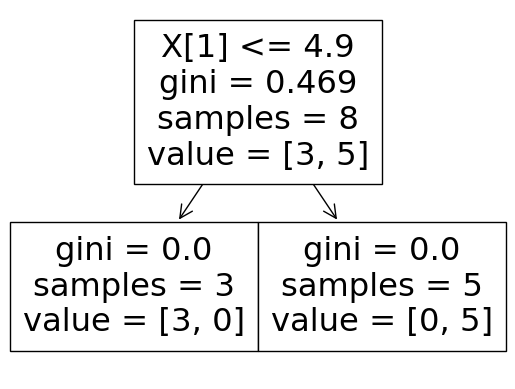

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


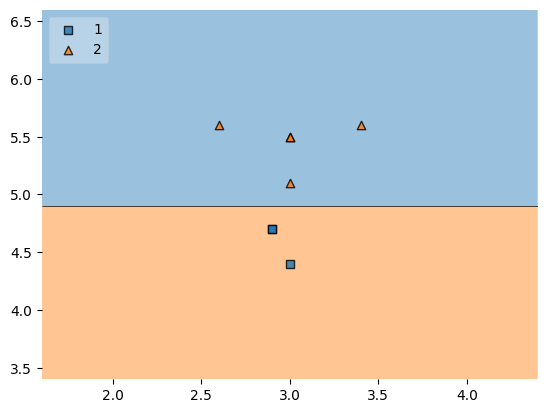

In [57]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [36]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
71,2.8,4.0,1
75,3.0,4.4,1
136,3.4,5.6,2
75,3.0,4.4,1
149,3.0,5.1,2
134,2.6,5.6,2
98,2.5,3.0,1
71,2.8,4.0,1


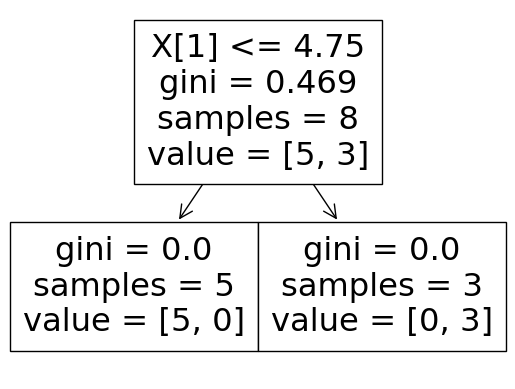

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


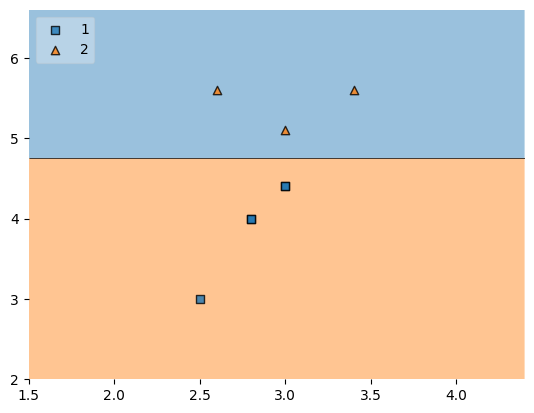

In [41]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [42]:
df_test

,sepal_width,petal_length,species
55,2.8,4.5,1
74,2.9,4.3,1
110,3.2,5.1,2
50,3.2,4.7,1
145,3.0,5.2,2


In [60]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [44]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
113,2.5,5.0,2
71,2.8,4.0,1
116,3.0,5.5,2
75,3.0,4.4,1
63,2.9,4.7,1
149,3.0,5.1,2
98,2.5,3.0,1
134,2.6,5.6,2
136,3.4,5.6,2
87,2.3,4.4,1


In [45]:
df_train.sample(8)

,sepal_width,petal_length,species
136,3.4,5.6,2
116,3.0,5.5,2
149,3.0,5.1,2
113,2.5,5.0,2
63,2.9,4.7,1
87,2.3,4.4,1
75,3.0,4.4,1
134,2.6,5.6,2


# Random Subspaces

In [48]:
df1 = sns.load_dataset("iris")
df1 = df1.sample(1)

In [49]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,setosa


In [52]:
df1.sample(2,replace=True,axis=1)

,sepal_length,species
45,4.8,setosa


In [51]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,sepal_width
45,1.4,3.0
45,1.4,3.0
45,1.4,3.0
45,1.4,3.0
45,1.4,3.0
45,1.4,3.0
45,1.4,3.0
45,1.4,3.0
